# 1 El algoritmo K-vecinos (K-nn)

Existen multitud de técnicas y algoritmos que podemos utilizar en Machine Learning, como clasificadores Bayesianos o árboles de decisión. Una de las técnicas más sencillas podría ser el método de los **K-vecinos** (o **K-nn** del inglés K-nearest neighbors). La idea de este algoritmo es que la etiqueta de clase que se asigna a un nueva muestra depende de los **k** ejemplos de entrenamiento que son más similares ésta. Esto es, se asigna la etiqueta de clase que más se repite en las k muestras más próximas a la nueva.

Si ejecutas el siguiente código podrás ver en una gráfica cómo se sitúan muestras rojas y azules. Teniendo en cuenta un valor de **k=1**, puedes ver que la muestra verde se clasificaría como azul. Para evitar empates, normalmente utilizaremos un número impar para el valor de k.

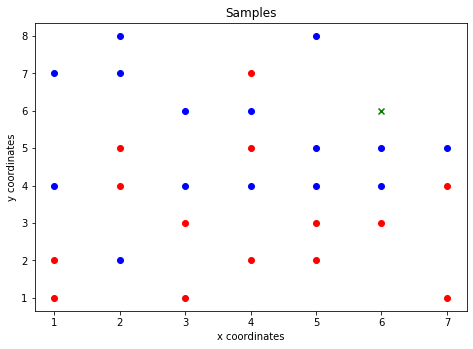

In [ ]:
import matplotlib.pyplot as plot #si no te funciona en tu entorno, haz un pip install matplotlib

red_points = [(1,1), (1,2), (2,4), (2,5), (3,1), (3,3), (4,2), (4,5), (4,7), (5,2), (5,3), (6,3), (7,1), (7,4)]
blue_points = [(1,4), (1,7), (2,2), (2,7), (2,8), (3,4), (3,6), (4,4), (4,6), (5,4), (5,5), (5,8), (6,4), (6,5), (7,5)]

red_x = [i[0] for i in red_points]
red_y = [i[1] for i in red_points]

blue_x = [i[0] for i in blue_points]
blue_y = [i[1] for i in blue_points]

fig=plot.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(red_x, red_y, color='r')
ax.scatter(blue_x, blue_y, color='b')
ax.scatter([6], [6], color='g', marker="x")
ax.set_xlabel('x coordinates')
ax.set_ylabel('y coordinates')
ax.set_title('Samples')
plot.show()

El concepto de cercanía entre dos muestras *p* y *q*, cada una de ellas representada como *n* atributos, lo podemos definir como la distancia euclidea entre ambas muestras:

$$d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \ldots + (p_n - q_n)^2}$$

A continuación, vamos a implementar el algoritmo K-nn desde cero, utilizando todos los conocimientos que ya tenemos de Python. Para ello, los pasos que vamos a seguir son los siguientes:

1.   Cargar las muestras
2.   Convertir los atributos a float
3.   Codificar los nombres de las clases en valores enteros
4.   Calcular la distancia euclidea
5.   Obtener los vecinos más cercanos utilizando la distancia euclidea
6.   Realizar predicciones



## 1.1 Cargando el dataset de muestras

El primer paso será implementar la función **load_file** que se encargará de leer los datos de un fichero (en formato csv) y guardarlos en una lista de muestras. Cada muestra estará representada como una lista de atributos, siendo el último de ellos, el nombre de la clase. Como resultado, debemos tener una lista de muestras, donde cada muestra tendrá la forma ['1', '1', 'red']. En primer lugar, **ejecuta el siguiente código** para clonar el repositorio donde está el fichero. A continuación, **completa el código** de la función **load_file**.

In [ ]:
!git clone https://gitlab.com/ia_gti/machine_learning_python.git

In [ ]:
from csv import reader

def load_file(filename):
  """ Reads a file and stores each line as a sample in a list
  Args: 
    filename: name of the dataset file
  Returns:
    list of samples, where each sample is: e.g. ['1', '1', 'red']
  """
  #TODO

#1. Load dataset
filename = 'sample_data//colours.csv'
dataset = load_file(filename)
print("1: "+str(dataset[0]))

print('Se ha cargado el fichero '+ filename+ ' con ', len(dataset),' líneas (muestras) y ', len(dataset[0]), ' columnas (atributos por muestra)')


## 1.2 Convirtiendo los atributos a float

El siguiente paso será implementar la función **convert_str_to_float**, que se encargará de convertir los atributos de la muestra a floats (excepto el nombre de clase, esto es, las columnas 0 y 1). Esta función recibirá la lista de muestras y una columna a convertir. Como resultado, cada muestra tendrá la forma [1.0, 1.0, 'red']. Utiliza la función **strip** para eliminar las comillas:
https://www.programiz.com/python-programming/methods/string/strip

In [ ]:
ATTRIBUTES = 2

def convert_str_to_float(dataset, column):
  """ Converts a string data to float
  Args: 
    dataset: list of samples, where each sample is: e.g. ['1', '1', 'red']
    column: column number
  """
  #TODO

#2. Convert numerical attributes to floats
for i in range(ATTRIBUTES): #i coge valores de 0 y 1
  convert_str_to_float(dataset, i)    
print("2: "+str(dataset[0]))


## 1.3 Codificando el nombre de clase a un valor entero

A continuación, codificaremos el nombre de las clases a un valor numérico mediante la función **code_str_to_int**. Cuando realizamos predicciones, los valores de clase se suelen representar como valores numéricos (p.e. 0, 1, etc.) en vez de strings (p.e. 'red', 'blue', etc.).

Esta función recibirá la lista de muestras con la forma [1.0, 1.0, 'red'] y una columna a convertir (la columna de la clase). Lo que hará esta función será asignar un valor numérico a cada clase y modificar cada muestra para que tenga la forma [1.0, 1.0, 0]. Además, deberá devolver un diccionario con pares clave-valor, donde la clave será el nombre de la clase y el valor su código. En nuestro caso, será {'red': 0, 'blue': 1}. 

Realiza una implementación genérica para cualquier número y nombre de clases.

In [ ]:
def code_str_to_int(dataset, column):
  """ Converts a string data to int
  Args: 
    dataset: list of samples, where each sample is: e.g. [1.0, 1.0, 'red']
    column: column number
  Returns:
    dictionary of class-int_code, such as { 'red':0, 'blue':1 }
  """
  #TODO

#3. Convert class attribute to integer
lookup = code_str_to_int(dataset, len(dataset[0])-1)
print("3: "+str(lookup))

## 1.4 Calculando la distancia entre dos muestras

Llegados a este punto, vamos a implementar la función **euclidean_distance** que recibirá dos muestras y devolverá la distancia euclídea entre ellas. Recuerda que la distancia euclídea se calcula según la siguiente fórmula:

$$d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \ldots + (p_n - q_n)^2}$$

Realiza una implementación genérica para cualquier número de atributos.

In [ ]:
from math import sqrt

def euclidean_distance(sample, dataset_sample):
  """ Calculates the Euclidean distance between two samples (vectors)
  Args: 
    sample: sample to classify, such as [4, 3]
    dataset_sample: sample of the dataset, such as [1.0, 1.0, 1]
  Returns:
    euclidean_distance between both samples, such as 3.61
  """
  #TODO

# sample to classify
sample = (4, 3)

for row in dataset:
	distance = euclidean_distance(sample, row)

## 1.5 Encontrando los k-vecinos más silimares

A continuación, implementaremos la función **get_neighbors**, la cual recibirá la lista de muestras (que llamaremos `train`), una muestra a clasificar y un número *k* y devolverá una lista con los *k* vecimos más similares a la muestra. Esta función tendrá que llamar a la función anterior **euclidean_distance** por cada muestra de entrenamiento:

In [ ]:
def get_neighbors(train, test, k):
  """ Obtains the k most similar neighbors
  Args: 
    train: list of samples
    test: sample to classify
    k: number of nearest neighbors
  Returns:
    list of the k nearest neighbors
  """
  #TODO

# define k parameter
num_neighbors = 5

# sample to classify
sample = (6, 2)

#5. Get k nearest neighbours using euclidean_distance function
neighbors = get_neighbors(dataset, sample, num_neighbors)

print(neighbors)

## 1.6 Realizando la predicción

Finalmente, realizaremos la predicción mediante la función **predict_class**. Realmente, el código de esta función podría ir dentro de la función anterior, pero hemos preferido dejarlo separado. Básicamente, tendrá que calcular cuál es la clase más repetida a partir los *k-vecinos* más próximos que ha encontrado en la función anterior.

In [ ]:
def predict_class(neighbors, lookup):    
  """ Obtains the predicted class for the test sample
  Args:
    neighbours: list of k nearest neighbors 
    lookup: dictionary of classes and int_code such as {'blue': 0, 'red': 1}
  Returns:
    name of the predicted class 
  """
  #TODO

#6. Predict the class label
label = predict_class(neighbors, lookup)
print('Data=%s, Predicted: %s' % (sample, label))


## 1.7 Ejercicio

Una vez tienes las funciones implementadas, genera un fichero .py (si no lo has hecho ya) y modifica las funciones para entrenar un modelo a partir del dataset de flores de iris. Quita 10 muestras y utilízalas para probar tu clasificador.

Utiliza un fichero a parte que importe el paquete implementado y prueba su funcionamiento.

# 2 K-nn usando scikit-learn

Una vez has implementado el algoritmo K-nn desde 0, vamos a utilizar la librería **scikit-learn** que es una librería de Machine Learning para Python (https://scikit-learn.org/stable/). Esta librería nos ofrece muchas funcionalidades implementadas, de manera que podemos trabajar con distintos algoritmos de Machine Learning de manera sencilla. Si quieres trabajar en tu máquina, para agregarla en tu entorno virtual de py3env, puedes ejecutar el siguiente comando:
```python
pip install scikit-learn
```

Aunque utilizaremos esta librería más adelante (y también en otras asignaturas), a continuación tienes un ejemplo muy sencillo de cómo podemos utilizar el clasificador K-nn que tiene ya implementado:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = [(1,1), (1,2), (2,4), (2,5), (3,1), (3,3), (4,2), (4,5), (4,7), (5,2), (5,3), (6,3), (7,1), (7,4), (1,4), (1,7), (2,2), (2,7), (2,8), (3,4), (3,6), (4,4), (4,6), (5,4), (5,5), (5,8), (6,4), (6,5), (7,5)]
y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# define k parameter
k = 5

neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y)

# sample to classify
sample = (6, 2)

prediction = neigh.predict([sample])
print(prediction)

[0]
